# Reconocedor de Vehículos

En este proyecto, he desarrollado un modelo de clasificación de vehículos utilizando una red neuronal convolucional. El objetivo del modelo es clasificar imágenes de vehículos en cinco categorías: avión, autobús, coche, motocicleta y camión. Para ello, vamos a utilizar un dataset contenido en nuestra cuenta de Google Drive. Antes, debemos montar nuestro sistema de archivos de Google Drive para hacerlo accesible desde este notebook.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Utilizaremos **data augmentation** ya que se aplican transformaciones aleatorias a las imágenes de entrenamiento en cada época. Esto genera nuevas variaciones de las imágenes originales, aumentando artificialmente el tamaño del conjunto de datos y proporcionando más diversidad. Esto ayuda al modelo a generalizar mejor y ser más robusto frente a variaciones en las imágenes.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Rescaling, Flatten, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# DATA SOURCE --------------------------------------------------

image_size = (150, 150)
batch_size = 32

# Crear un generador de datos con data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Generador de datos de validación sin data augmentation
val_datagen = ImageDataGenerator(rescale=1./255)

# Cargar los datos de entrenamiento y validación
train_ds = train_datagen.flow_from_directory(
    "/content/drive/MyDrive/Colab Notebooks/datasets/vehicles/train",
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)
val_ds = val_datagen.flow_from_directory(
    "/content/drive/MyDrive/Colab Notebooks/datasets/vehicles/validation",
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)
test_ds = val_datagen.flow_from_directory(
    "/content/drive/MyDrive/Colab Notebooks/datasets/vehicles/test",
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 1400 images belonging to 5 classes.
Found 231 images belonging to 5 classes.
Found 130 images belonging to 5 classes.


En este proyecto, se han probado diferentes configuraciones de hiperparámetros para evaluar su impacto en el rendimiento del modelo de clasificación de vehículos. Las configuraciones permiten comparar cómo diferentes ajustes en los hiperparámetros afectan el rendimiento del modelo y ayudan a determinar la mejor configuración para obtener los mejores resultados.

*    Configuración 1: Cambiar el Número de Filtros en las Capas Convolucionales
*   Configuración 2: Cambiar el Tamaño del Kernel en las Capas Convolucionales
*  Configuración 3: Cambiar el Tamaño del Lote y el Número de Épocas







## Configuración 1. Cambiar el Número de Filtros

En esta configuración, se ajustó el número de filtros a 16, 32 y 64 en las respectivas capas convolucionales.

In [ ]:
# MODEL --------------------------------------------------

def create_model():
    model = keras.Sequential()
    model.add(Rescaling(scale=(1./127.5), offset=-1, input_shape=(150, 150, 3)))
    model.add(Conv2D(16, kernel_size=(3, 3), activation='relu'))  # Cambiado a 16 filtros
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(32, (3, 3), activation='relu'))  # Cambiado a 32 filtros
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(64, (3, 3), activation='relu'))  # Cambiado a 64 filtros
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(5, activation='softmax'))  # Cambiado a 5 clases

    model.compile(loss=tf.keras.losses.categorical_crossentropy,
                  optimizer=tf.keras.optimizers.Adam(1e-3),
                  metrics=['accuracy'])
    return model

model = create_model()

# TRAINING --------------------------------------------------

epochs = 200

es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=3, restore_best_weights=True)

h1 = model.fit(
        train_ds,
        epochs=epochs,
        validation_data=val_ds,
        callbacks=[es]
)

model.save("modelo1.keras")

Epoch 1/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 23s 317ms/step - accuracy: 0.4650 - loss: 3.7389 - val_accuracy: 0.1861 - val_loss: 7.0554
Epoch 2/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 114ms/step - accuracy: 0.7164 - loss: 0.7289 - val_accuracy: 0.1818 - val_loss: 19.8645
Epoch 3/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 131ms/step - accuracy: 0.7718 - loss: 0.6001 - val_accuracy: 0.1818 - val_loss: 25.5837
Epoch 4/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 136ms/step - accuracy: 0.7802 - loss: 0.4935 - val_accuracy: 0.3030 - val_loss: 8.8400
Epoch 5/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 119ms/step - accuracy: 0.8011 - loss: 0.4524 - val_accuracy: 0.1818 - val_loss: 22.2866
Epoch 6/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 10s 118ms/step - accuracy: 0.8378 - loss: 0.4418 - val_accuracy: 0.2944 - val_loss: 8.0020
Epoch 7/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 11s 135ms/step - accuracy: 0.8654 - loss: 0.3387 - val_accuracy: 0.4675 - val_loss: 5.2542
Epoch 8/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 11s 152ms/step - accuracy: 0.8474 - loss: 0.3457 - v

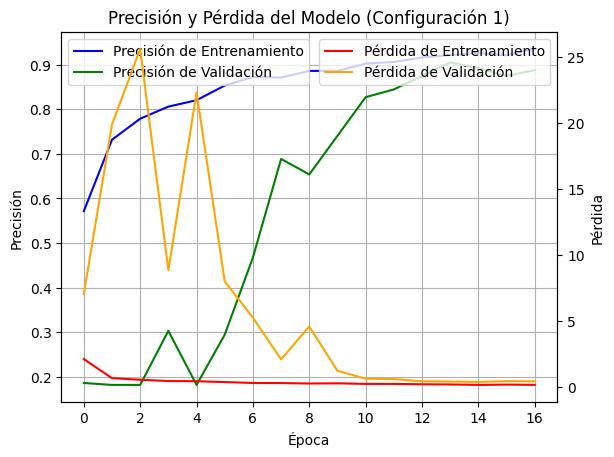

In [ ]:
import matplotlib.pyplot as plt

# Crear una figura y ejes
fig, ax1 = plt.subplots()

# Graficar la precisión en el eje izquierdo
ax1.plot(h1.history['accuracy'], label='Precisión de Entrenamiento', color='blue')
ax1.plot(h1.history['val_accuracy'], label='Precisión de Validación', color='green')
ax1.set_xlabel('Época')
ax1.set_ylabel('Precisión')
ax1.legend(loc='upper left')
ax1.grid(True)

# Crear un segundo eje para la pérdida
ax2 = ax1.twinx()
ax2.plot(h1.history['loss'], label='Pérdida de Entrenamiento', color='red')
ax2.plot(h1.history['val_loss'], label='Pérdida de Validación', color='orange')
ax2.set_ylabel('Pérdida')
ax2.legend(loc='upper right')

# Título de la gráfica
plt.title('Precisión y Pérdida del Modelo (Configuración 1)')

# Mostrar la gráfica
plt.show()


Esta configuración muestra una mejora significativa en la precisión y una reducción considerable en la pérdida de validación. El modelo alcanzó una precisión de validación del 90.48% y una pérdida de validación de 0.4290.

## Configuración 2: Cambiar el Tamaño del Kernel

En esta configuración, se ajustó el tamaño del kernel a 5x5 en todas las capas convolucionales.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Rescaling, Flatten, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# MODEL --------------------------------------------------

def create_model():
    model = keras.Sequential()
    model.add(Rescaling(scale=(1./127.5), offset=-1, input_shape=(150, 150, 3)))
    model.add(Conv2D(32, kernel_size=(5, 5), activation='relu'))  # Cambiado a kernel de 5x5
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (5, 5), activation='relu'))  # Cambiado a kernel de 5x5
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(128, (5, 5), activation='relu'))  # Cambiado a kernel de 5x5
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(5, activation='softmax'))  # Cambiado a 5 clases

    model.compile(loss=tf.keras.losses.categorical_crossentropy,
                  optimizer=tf.keras.optimizers.Adam(1e-3),
                  metrics=['accuracy'])
    return model

model = create_model()

In [ ]:
# TRAINING --------------------------------------------------

epochs = 200

es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=3, restore_best_weights=True)

h2 = model.fit(
        train_ds,
        epochs=epochs,
        validation_data=val_ds,
        callbacks=[es]
)

model.save("modelo2.keras")

Epoch 1/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 16s 193ms/step - accuracy: 0.4338 - loss: 5.0108 - val_accuracy: 0.4199 - val_loss: 2.0528
Epoch 2/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 15s 185ms/step - accuracy: 0.5934 - loss: 1.1469 - val_accuracy: 0.3203 - val_loss: 3.0096
Epoch 3/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 135ms/step - accuracy: 0.6535 - loss: 0.9464 - val_accuracy: 0.4719 - val_loss: 2.5687
Epoch 4/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 146ms/step - accuracy: 0.6601 - loss: 1.1954 - val_accuracy: 0.4935 - val_loss: 2.6420
Epoch 5/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 10s 138ms/step - accuracy: 0.6978 - loss: 1.0281 - val_accuracy: 0.5541 - val_loss: 1.7749
Epoch 6/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 7s 156ms/step - accuracy: 0.7345 - loss: 0.8237 - val_accuracy: 0.6320 - val_loss: 1.2576
Epoch 7/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 9s 136ms/step - accuracy: 0.7529 - loss: 0.6144 - val_accuracy: 0.7143 - val_loss: 1.0879
Epoch 8/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 10s 124ms/step - accuracy: 0.7853 - loss: 0.5866 - val_

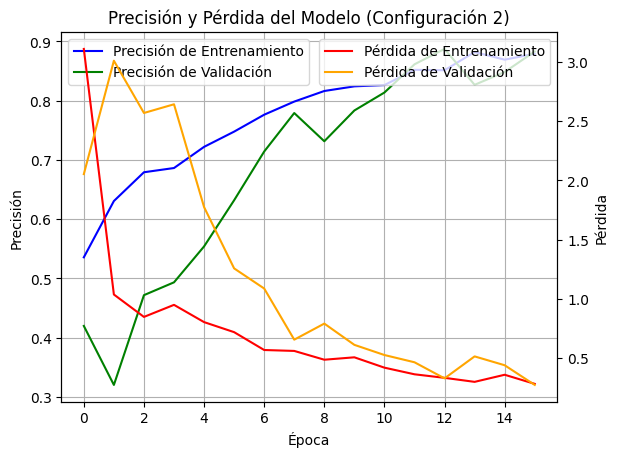

In [ ]:
import matplotlib.pyplot as plt

# Crear una figura y ejes
fig, ax1 = plt.subplots()

# Graficar la precisión en el eje izquierdo
ax1.plot(h2.history['accuracy'], label='Precisión de Entrenamiento', color='blue')
ax1.plot(h2.history['val_accuracy'], label='Precisión de Validación', color='green')
ax1.set_xlabel('Época')
ax1.set_ylabel('Precisión')
ax1.legend(loc='upper left')
ax1.grid(True)

# Crear un segundo eje para la pérdida
ax2 = ax1.twinx()
ax2.plot(h2.history['loss'], label='Pérdida de Entrenamiento', color='red')
ax2.plot(h2.history['val_loss'], label='Pérdida de Validación', color='orange')
ax2.set_ylabel('Pérdida')
ax2.legend(loc='upper right')

# Título de la gráfica
plt.title('Precisión y Pérdida del Modelo (Configuración 2)')

# Mostrar la gráfica
plt.show()


Esta configuración también muestra una mejora significativa en la precisión y una reducción en la pérdida de validación. El modelo alcanzó una precisión de validación del 88.31% y una pérdida de validación de 0.2745.

## Configuración 3: Cambiar el Tamaño del Lote y el Número de Épocas

En esta configuración, se ajustó el tamaño del lote a 64 y el número de épocas a 100.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Rescaling, Flatten, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# DATA SOURCE --------------------------------------------------

image_size = (150, 150)
batch_size = 64  # Cambiado a 64

# Crear un generador de datos con data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Generador de datos de validación sin data augmentation
val_datagen = ImageDataGenerator(rescale=1./255)

# Cargar los datos de entrenamiento y validación
train_ds = train_datagen.flow_from_directory(
    "/content/drive/MyDrive/Colab Notebooks/datasets/vehicles/train",
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)
val_ds = val_datagen.flow_from_directory(
    "/content/drive/MyDrive/Colab Notebooks/datasets/vehicles/validation",
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)
test_ds = val_datagen.flow_from_directory(
    "/content/drive/MyDrive/Colab Notebooks/datasets/vehicles/test",
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 1400 files belonging to 5 classes.
Found 231 files belonging to 5 classes.
Found 130 files belonging to 5 classes.


In [ ]:
# MODEL --------------------------------------------------

def create_model():
    model = keras.Sequential()
    model.add(Rescaling(scale=(1./127.5), offset=-1, input_shape=(150, 150, 3)))
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(5, activation='softmax'))  # Cambiado a 5 clases

    model.compile(loss=tf.keras.losses.categorical_crossentropy,
                  optimizer=tf.keras.optimizers.Adam(1e-3),
                  metrics=['accuracy'])
    return model

model = create_model()

In [ ]:
# TRAINING --------------------------------------------------

epochs = 100  # Cambiado a 100

es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=10, restore_best_weights=True)

h3 = model.fit(
        train_ds,
        epochs=epochs,
        validation_data=val_ds,
        callbacks=[es]
)

model.save("modelo3.keras")

Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 260ms/step - accuracy: 0.6938 - loss: 1.0233 - val_accuracy: 0.2468 - val_loss: 31.0897
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 12s 328ms/step - accuracy: 0.6747 - loss: 0.9270 - val_accuracy: 0.2468 - val_loss: 34.6602
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 230ms/step - accuracy: 0.7100 - loss: 0.8131 - val_accuracy: 0.2468 - val_loss: 35.4593
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 324ms/step - accuracy: 0.7704 - loss: 0.6975 - val_accuracy: 0.2468 - val_loss: 28.4766
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 9s 266ms/step - accuracy: 0.7682 - loss: 0.6785 - val_accuracy: 0.2468 - val_loss: 26.4511
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 266ms/step - accuracy: 0.8007 - loss: 0.5150 - val_accuracy: 0.2468 - val_loss: 21.1872
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 295ms/step - accuracy: 0.7803 - loss: 0.5743 - val_accuracy: 0.2468 - val_loss: 21.0899
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 9s 244ms/step - accuracy: 0.8178 - loss: 0.4570 -

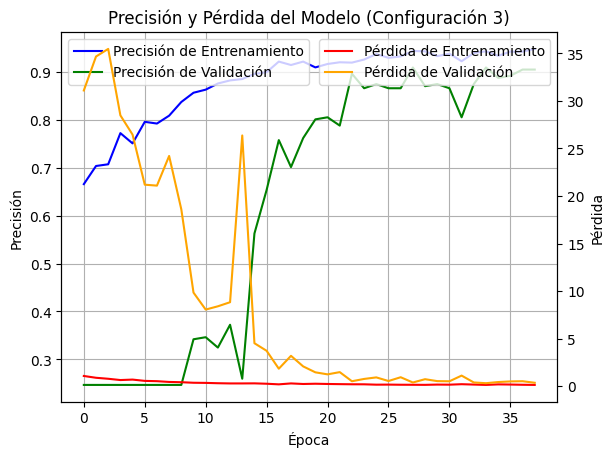

In [ ]:
import matplotlib.pyplot as plt

# Crear una figura y ejes
fig, ax1 = plt.subplots()

# Graficar la precisión en el eje izquierdo
ax1.plot(h3.history['accuracy'], label='Precisión de Entrenamiento', color='blue')
ax1.plot(h3.history['val_accuracy'], label='Precisión de Validación', color='green')
ax1.set_xlabel('Época')
ax1.set_ylabel('Precisión')
ax1.legend(loc='upper left')
ax1.grid(True)

# Crear un segundo eje para la pérdida
ax2 = ax1.twinx()
ax2.plot(h3.history['loss'], label='Pérdida de Entrenamiento', color='red')
ax2.plot(h3.history['val_loss'], label='Pérdida de Validación', color='orange')
ax2.set_ylabel('Pérdida')
ax2.legend(loc='upper right')

# Título de la gráfica
plt.title('Precisión y Pérdida del Modelo (Configuración 3)')

# Mostrar la gráfica
plt.show()


Esta configuración muestra una mejora significativa en la precisión y una reducción considerable en la pérdida de validación. El modelo alcanzó una precisión de validación del 90.48% y una pérdida de validación de 0.3652.

## Conclusión

Todas las configuraciones muestran mejoras significativas en la precisión y la pérdida de validación. Sin embargo, la Configuración 1 y la Configuración 3 alcanzaron la misma precisión de validación del 90.48%, pero la Configuración 3 tiene una pérdida de validación menor (0.3652) en comparación con la Configuración 1 (0.4290). Por lo tanto, la Configuración 3 es la mejor opción en términos de precisión y pérdida de validación.

# Evaluación de los resultados

Forma de la imagen: (1, 150, 150, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 753ms/step


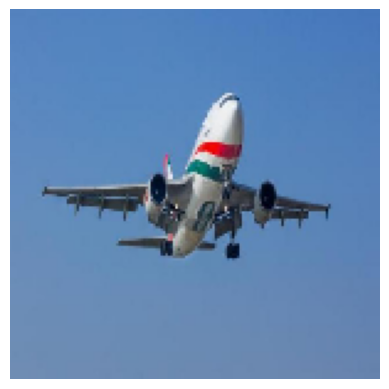

La imagen es un: airplane
Forma de la imagen: (1, 150, 150, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


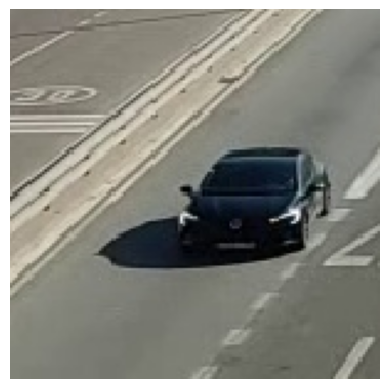

La imagen es un: car
Forma de la imagen: (1, 150, 150, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


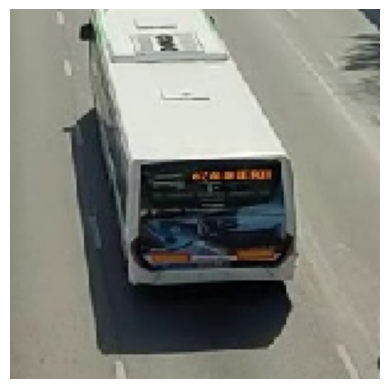

La imagen es un: bus
Forma de la imagen: (1, 150, 150, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


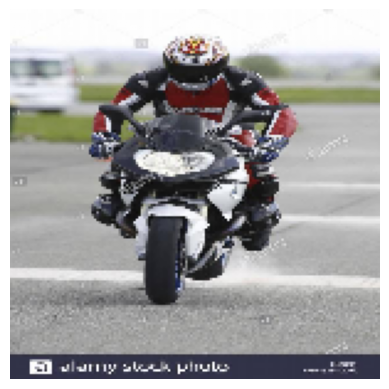

La imagen es un: motorcycle
Forma de la imagen: (1, 150, 150, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


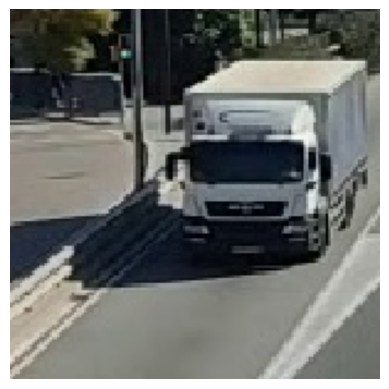

La imagen es un: truck


In [ ]:
import tensorflow as tf
from tensorflow import keras
from matplotlib.pyplot import imshow
import numpy as np
import matplotlib.pyplot as plt

# Cargar el modelo entrenado
model = keras.models.load_model("modelo3.keras")

# Compilar el modelo (opcional, pero elimina la advertencia)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Definir las clases
class_names = [
    'airplane',
    'bus',
    'car',
    'motorcycle',
    'truck'
]

# Función para cargar, preprocesar y predecir la clase de una imagen
def predict_and_show(image_path):
    # Cargar y preprocesar la imagen
    image_size = (150, 150)
    img = keras.preprocessing.image.load_img(image_path, target_size=image_size)
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Crear eje de lote

    # Asegurarse de que la forma de la entrada es correcta
    print(f"Forma de la imagen: {img_array.shape}")

    # Hacer la predicción
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions[0])

    # Obtener el nombre de la clase predicha
    predicted_label = class_names[predicted_class]

    # Mostrar la imagen sin escala de colores y números
    plt.figure()
    imshow(img_array[0] / 255.0)
    plt.axis('off')  # Ocultar los ejes
    plt.show()

    # Mostrar la predicción fuera de la imagen
    print(f"La imagen es un: {predicted_label}")

# Lista de rutas de las imágenes
image_paths = [
    '/content/drive/MyDrive/Colab Notebooks/datasets/vehicles/test/airplane/00000961_jpeg_jpg.rf.13a3728369b361184fd093a30e478b74.jpg',
    '/content/drive/MyDrive/Colab Notebooks/datasets/vehicles/test/car/vehicle_188.jpg',
    '/content/drive/MyDrive/Colab Notebooks/datasets/vehicles/test/bus/vehicle_558.jpg',
    '/content/drive/MyDrive/Colab Notebooks/datasets/vehicles/test/motorcycle/15_jpg.rf.63f3be7329c2b9f355520be15e1dbc4a.jpg',
    '/content/drive/MyDrive/Colab Notebooks/datasets/vehicles/test/truck/vehicle_38.jpg'
]

# Predecir y mostrar cada imagen
for image_path in image_paths:
    predict_and_show(image_path)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
              precision    recall  f1-score   support

           0     0.9524    0.9756    0.9639        41
           1     0.8525    0.9811    0.9123        53
           2     0.8500    0.8500    0.8500        60
           3     0.8182    0.8182    0.8182        11
           4     0.9298    0.8030    0.8618        66

    accuracy                         0.8874       231
   macro avg     0.8806    0.8856    0.8812       231
weighted avg     0.8900    0.8874    0.8864       231



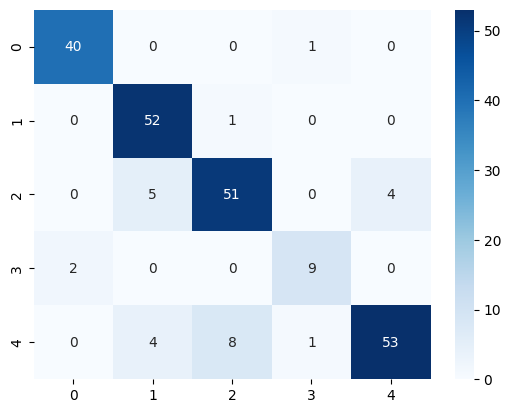

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

results = np.concatenate([(y, model.predict(x=x)) for x, y in val_ds], axis=1)

predictions = np.argmax(results[0], axis=1)
labels = np.argmax(results[1], axis=1)

cf_matrix = confusion_matrix(labels, predictions)

sns.heatmap(cf_matrix, annot=True, fmt="d", cmap="Blues")

print(classification_report(labels, predictions, digits = 4))

### Evaluación Final del Modelo
El modelo final fue evaluado utilizando un conjunto de datos de prueba y mostró los siguientes resultados:
- **Precisión Global**: 88.74%
- **Informe de Clasificación**:
  - **Clase 0 (airplane)**: Precisión 95.24%, Recall 97.56%, F1-Score 96.39%
  - **Clase 1 (bus)**: Precisión 85.25%, Recall 98.11%, F1-Score 91.23%
  - **Clase 2 (car)**: Precisión 85.00%, Recall 85.00%, F1-Score 85.00%
  - **Clase 3 (motorcycle)**: Precisión 81.82%, Recall 81.82%, F1-Score 81.82%
  - **Clase 4 (truck)**: Precisión 92.98%, Recall 80.30%, F1-Score 86.18%

El modelo ha demostrado ser efectivo en la clasificación de vehículos, con una precisión global del 88.74% y un buen rendimiento en todas las clases. La **Configuración 3** se selecciona como la mejor configuración debido a su menor pérdida de validación y alta precisión.

# Categorical Cross Entropy

Categorical cross entropy está diseñada para medir la discrepancia entre las distribuciones de probabilidad predichas y las verdaderas.

### ¿Cómo Funciona?

La categorical cross entropy calcula la pérdida comparando las probabilidades predichas por el modelo con las etiquetas verdaderas (one-hot encoded). La fórmula matemática es la siguiente:

$$
L = -\sum_{i=1}^{N} y_i \log(\hat{y}_i)
$$

### ¿Por Qué Funciona?

1. **Penalización de Errores**: Penaliza fuertemente las predicciones incorrectas. Si el modelo predice una probabilidad baja para la clase correcta, la pérdida será alta, incentivando al modelo a ajustar sus pesos para mejorar la precisión.
2. **Probabilidades**: Trabaja directamente con probabilidades. Permite que el modelo aprenda a asignar probabilidades más precisas a cada clase.
3. **Diferenciabilidad**: Es diferenciable, lo que permite utilizar técnicas de optimización basadas en gradientes, como el descenso de gradiente, para minimizar la pérdida y entrenar el modelo de manera eficiente.
4. **Normalización**: La función de pérdida considera todas las clases y normaliza la pérdida, lo que ayuda a evitar problemas de escala y asegura que el modelo no se sesgue hacia una clase en particular.
